In [ ]:
with open("subgenres.txt", "r", encoding="utf-8") as file:
    interests = file.read().strip().split(" | ")

interests

In [ ]:
import re
import json

# Read the file
with open("subgenres info.txt", "r", encoding="utf-8") as file:
    lines = file.read().split("\n")

genre_list = []
first = True

for line_ind in range(len(lines)):
    line = lines[line_ind].strip()  # Strip whitespace
    
    if first:
        if line == "":
            first = False  # Next line will contain metadata
            continue  # Skip empty lines

        parts = line.split("\t", 1)  # Split title and description
        if len(parts) < 2:
            continue  # Skip malformed lines

        name, description = parts
        

    else:
        if line == "":
            first = True  # Reset for next entry
            continue

        # Extract metadata fields
        metadata = {}
        for item in line.split(" | "):
            key_value = item.split(": ")
            if len(key_value) == 2:
                key, value = key_value
                metadata[key.lower().replace(" ", "_")] = value  # Standardize keys

        # Store in list as a dictionary
        genre_list.append({
            "title": name,
            "description": description,
            **metadata  # Merge metadata fields into the dictionary
        })

# Save to JSON (Optional)
with open("parsed_subgenres.json", "w", encoding="utf-8") as json_file:
    json.dump(genre_list, json_file, indent=4, ensure_ascii=False)

# Print a sample entry
print(json.dumps(genre_list[:3], indent=4, ensure_ascii=False))  # Show first 3 entries


In [ ]:
lines

### SUB-GENRES

In [ ]:
import re
import os

def get_subgenre(sub_genre="erotic-thriller"):

    with open(f"subgenre-films/{sub_genre}.txt", 'r', encoding='utf-8') as file:
        text = file.read()

    # Regex pattern: Number followed by a dot and space, then movie title, capturing only the title
    pattern = r'\b\d{1,4}\.\s+([^\n]+)'

    titles = re.findall(pattern, text)

    return titles

subgenres_dict = {}
subgenres = [f.replace(".txt", "") for f in os.listdir("subgenre-films/") if f.endswith(".txt")]

for sg in subgenres:
    titles = get_subgenre(sub_genre=sg)
    subgenres_dict[sg] = titles

print(len(subgenres_dict["erotic-thriller"]))


In [ ]:
len(subgenres_dict["erotic-thriller"])

In [ ]:
counts = [len(subgenres_dict[sg]) for sg in subgenres]
min(counts)

In [ ]:
with open("subgenres_movies.json", 'w', encoding='utf-8') as f:
        json.dump(subgenres_dict, f, ensure_ascii=False, indent=4)

print("Data saved to json file")

In [ ]:
import matplotlib.pyplot as plt

def plot_horizontal_barplot(subgenres, counts):
    # Sort subgenres and counts in descending order
    sorted_pairs = sorted(zip(counts, subgenres), reverse=False)
    counts_sorted, subgenres_sorted = zip(*sorted_pairs)
    
    fig, ax = plt.subplots(figsize=(10, len(subgenres) * 0.5))  # Adjust height dynamically

    bars = ax.barh(subgenres_sorted, counts_sorted, color='skyblue')

    # Annotate each bar with its count value
    for bar, count in zip(bars, counts_sorted):
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,  # Position to the right
                str(count), ha='left', va='center', color='black', fontsize=10)

    ax.set_xlabel("Count")
    ax.set_ylabel("Subgenre")
    ax.set_title("Number of Movies per Subgenre")
    plt.savefig("subgenre_counts.pdf")

    plt.show()

plot_horizontal_barplot(subgenres, counts)


In [ ]:
import re

def extract_movie_info(text):
    movie_data = {}

    # Split text into lines
    lines = text.split("\n")
    
    # Pattern to detect lines with a movie title
    pattern = r'(\b\d{1,4})\. '  # Matches a number followed by a dot and space

    # Find the first line where the pattern split yields more than one element
    title = None
    for line in lines:
        title_split = re.split(pattern, line)
        if len(title_split) > 1:
            title = title_split[-1].strip()  # The movie title is the last part of the split
            break

    movie_data["title"] = title

    # Extract year (first four-digit number in the text)
    year_match = re.search(r'\b(19\d{2}|20\d{2})\b', text)
    movie_data["year"] = int(year_match.group(1)) if year_match else None

    # Extract IMDb rating (first decimal number in the format "X.Y")
    rating_match = re.search(r'(\d\.\d)\s*\(', text)
    movie_data["rating"] = float(rating_match.group(1)) if rating_match else None

    # Extract number of ratings (inside parentheses, formatted like "(9.2K)")
    num_ratings_match = re.search(r'\(([\d.,Kk]+)\)', text)
    if num_ratings_match:
        num_ratings = num_ratings_match.group(1).lower().replace('k', '000').replace(',', '')
        movie_data["number_of_ratings"] = int(float(num_ratings))
    else:
        movie_data["number_of_ratings"] = None

    # Extract TV Movie or TV Special status as a boolean
    movie_data["tv_movie"] = bool(re.search(r'\b(TV Movie|TV Special)\b', text, re.IGNORECASE))

    # Extract MPAA rating (G, PG, Not Rated, etc.)
    mpaa_match = re.search(r'\b(G|PG-13|PG|R|NC-17|Not Rated|Unrated|TV-G|TV-PG|TV-14|TV-MA)\b', text)
    movie_data["mpaa_rating"] = mpaa_match.group(1) if mpaa_match else None

    # Extract runtime (e.g., "1h 45m")
    runtime_match = re.search(r'\b(\d+h \d+m|\d+h|\d+m)\b', text)
    movie_data["runtime"] = runtime_match.group(1) if runtime_match else None

    # Extract the full movie synopsis (everything after Metascore if present)
    description_match = re.search(r'Metascore\s*\n*(.*)', text, re.DOTALL)
    movie_data["description"] = description_match.group(1).strip() if description_match else None

    return movie_data

# Example usage
movie_text1 = """34. Brian's Song
1971
1h 13m
G
7.5
 (9.2K)
TV Movie
62
Metascore

Buzz Kulik's beloved tearjerker is based on the real-life friendship between Chicago Bears teammates Brian Piccolo and Gale Sayers and the bond that was strengthened when Piccolo discovers that he has a fatal disease."""

movie_text2 = """Rudy (1993)
8. Rudy
1993
1h 54m
PG
7.5
 (71K)
71
Metascore

Rudy has always been told that he was too small to play college football. But he is determined to overcome the odds and fulfill his dream of playing for Notre Dame."""

movie_text3 = """45. The Christmas Special
2022
TV Special
1h 30m
Not Rated
6.8
 (5K)
Metascore

A heartwarming holiday tale about a small town coming together to save Christmas."""

print(extract_movie_info(movie_text1))
print(extract_movie_info(movie_text2))
print(extract_movie_info(movie_text3))


In [ ]:
print(extract_movie_info(movie_text2))

In [ ]:
movie_text3 = """Auditorium in San Francisco, California.
94. NFL '68: The Year of the Game
1969
26m
TV Special

Highlights from the National Football League's 1968 season."""
print(extract_movie_info(movie_text3))

### BETTER PARSER (HOPEFULLY)

In [4]:
import re
import pandas as pd

def extract_movie_info(block):
    lines = [line.strip() for line in block.strip().split("\n") if line.strip()]
    if not lines:
        return None

    # First line always contains number and title
    title_match = re.match(r"^(\d+)\.\s+(.*)", lines[0])
    if not title_match:
        return None

    title = title_match.group(2)

    data = {
        "Title": title,
        "Year": None,
        "Duration": None,
        "Rating": "Not Rated",
        "TV Movie": "TV Movie" in block,
        "IMDb Rating": None,
        "Votes": None,
        "Metascore": None,
        "Synopsis": ""
    }

    # Extract Year, Duration, MPAA Rating
    for line in lines[1:6]:
        if re.match(r"^\d{4}$", line):
            data["Year"] = int(line)
        elif re.match(r"^\d+h \d+m$", line):
            data["Duration"] = line
        elif line in {"G", "PG", "PG-13", "R", "NC-17", "TV-MA", "TV-14", "Not Rated", "Unrated"}:
            data["Rating"] = line

    # IMDb rating and votes
    imdb_match = re.search(r"(\d\.\d)\s+\(([\d.,K]+)\)", block)
    if imdb_match:
        data["IMDb Rating"] = float(imdb_match.group(1))
        votes_str = imdb_match.group(2).replace(",", "")
        data["Votes"] = int(float(votes_str.replace("K", "")) * 1000) if "K" in votes_str else int(votes_str)

    # Metascore
    meta_match = re.search(r"(\d{1,3})\s+Metascore", block)
    if meta_match:
        data["Metascore"] = int(meta_match.group(1))

    # Robust Synopsis extraction
    synopsis_started = False
    synopsis_lines = []
    for line in lines:
        if synopsis_started:
            if re.match(r"^\d+\.\s", line):  # Start of next movie
                break
            if re.match(r".*\(\d{4}\).*", line):  # Skip actor references
                continue
            synopsis_lines.append(line)
        if "Metascore" in line or re.match(r"\(\d+[.,K]+\)", line):
            synopsis_started = True

    data["Synopsis"] = " ".join(synopsis_lines).strip()

    return data

def parse_movies_from_file(filename):
    with open(filename, "r", encoding="utf-8") as file:
        content = file.read()

    # Adjusted split to robustly capture every movie (including first and last)
    movie_blocks = re.split(r"(?<=\n)(?=\d+\.\s)", content.strip())
    
    movies = [extract_movie_info(block) for block in movie_blocks]

    return [movie for movie in movies if movie]

# Example usage:
filename = "subgenre-films/erotic-thriller.txt"
movies_data = parse_movies_from_file(filename)

df = pd.DataFrame(movies_data)

len(df)  # Now correctly returns 334


331

In [6]:
import os

subgenres_dict = {}
subgenres = [f.replace(".txt", "").strip() for f in os.listdir("subgenre-films/") if f.endswith(".txt")]

for sg in subgenres:
    filename = f"subgenre-films/{sg}.txt"
    titles = parse_movies_from_file(filename = filename)
    subgenres_dict[sg] = titles

print(len(subgenres_dict["holiday-romance"]))

365


In [7]:
subgenres_dict['american-football-sport'][52]

{'Title': 'Monday Night Mayhem',
 'Year': 2002,
 'Duration': '1h 38m',
 'Rating': 'Not Rated',
 'TV Movie': True,
 'IMDb Rating': 6.6,
 'Votes': 858,
 'Metascore': None,
 'Synopsis': ''}

### REMOVE TV CRAP

In [8]:
def count_tv_movies(subgenres_dict, year_cutoff=1975):
    """Counts movies that are either TV Movies or Not Rated exactly once per movie,
    considering only movies made after the given year cutoff."""
    
    tv_movie_counts = {}

    for subgenre, movies in subgenres_dict.items():
        count = sum(
            ((movie.get("TV Movie", False) is True) or (movie.get("Rating", "Not Rated") == "Not Rated"))
            and ((movie.get("Year") or 0) > year_cutoff)
            for movie in movies
        )
        tv_movie_counts[subgenre] = count

    return tv_movie_counts


tv_movie_counts = count_tv_movies(subgenres_dict)
print(tv_movie_counts["dystopian-sci-fi"])


100


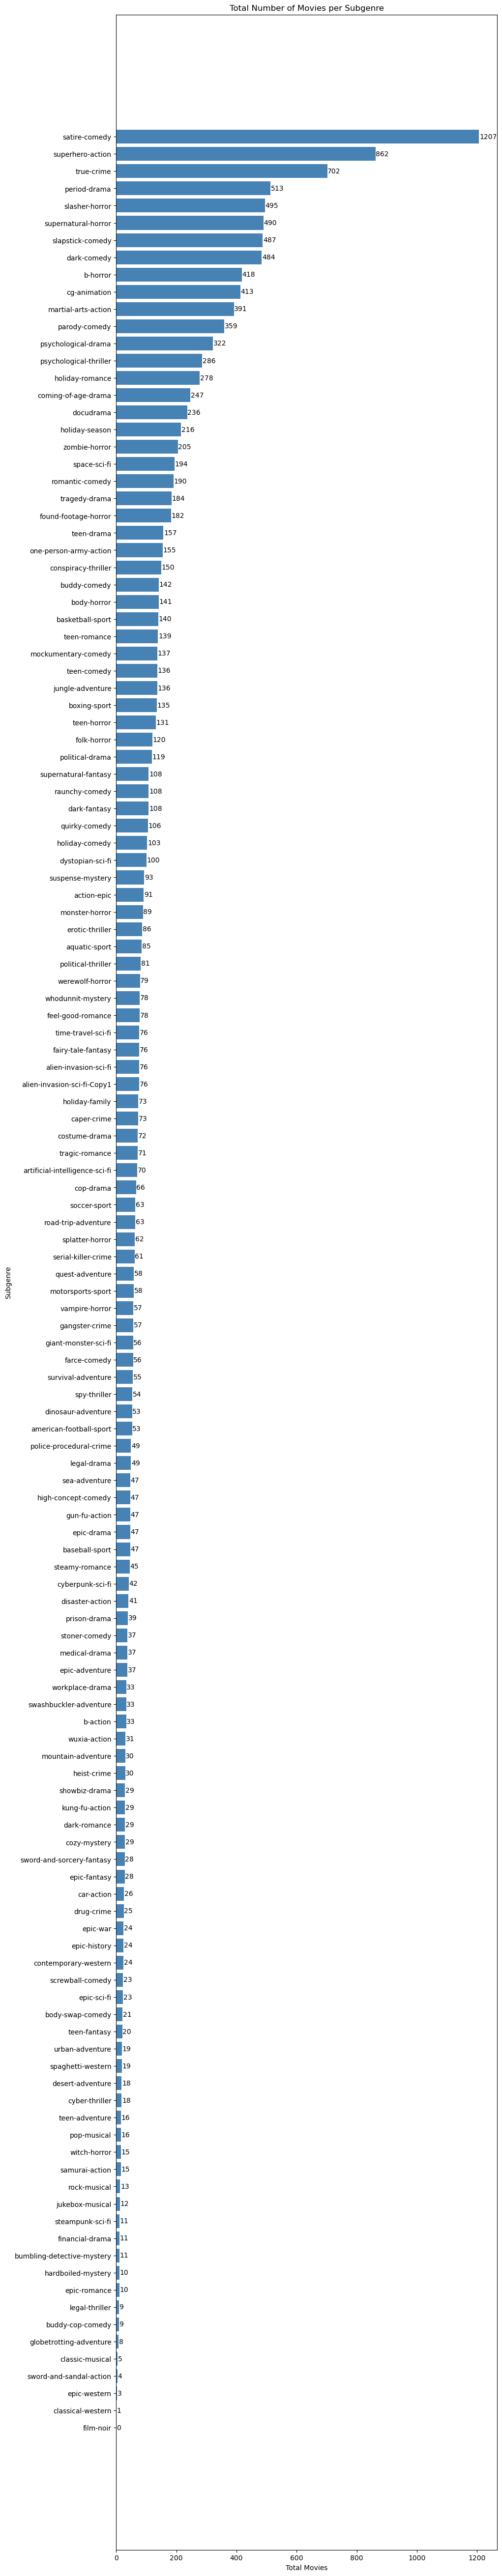

In [10]:
import matplotlib.pyplot as plt

def plot_subgenre_counts(counts):
    """Plots the total number of movies in each subgenre."""

    # Sort subgenres by count in ascending order
    subgenres_sorted, counts_sorted = zip(*sorted(counts.items(), key=lambda x: x[1], reverse=False))

    fig, ax = plt.subplots(figsize=(10, len(subgenres_sorted) * 0.5))  # Adjust height dynamically

    bars = ax.barh(subgenres_sorted, counts_sorted, color='steelblue')

    # Annotate each bar with its count value
    for bar, count in zip(bars, counts_sorted):
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
                str(count), ha='left', va='center', color='black', fontsize=10)

    ax.set_xlabel("Total Movies")
    ax.set_ylabel("Subgenre")
    ax.set_title("Total Number of Movies per Subgenre")
    plt.savefig("subgenre_total_counts.pdf")

    plt.show()

# Example usage:
plot_subgenre_counts(tv_movie_counts)


In [11]:
def filter_out_tv_and_unrated_movies(subgenres_dict, year_cutoff=1975):
    """Removes movies that are either TV Movies or Not Rated made after the given year cutoff."""
    filtered_dict = {}

    for subgenre, movies in subgenres_dict.items():
        filtered_movies = [
            movie for movie in movies
            if not (
                ((movie.get("TV Movie", False) is True) or (movie.get("Rating", "Not Rated") == "Not Rated"))
                and ((movie.get("Year") or 0) > year_cutoff)
            )
        ]
        filtered_dict[subgenre] = filtered_movies

    return filtered_dict

filtered_subgenres_dict = filter_out_tv_and_unrated_movies(subgenres_dict, year_cutoff=1970)

import json

with open("filtered_movies.json", "w", encoding="utf-8") as json_file:
    json.dump(filtered_subgenres_dict, json_file, indent=4, ensure_ascii=False)


In [17]:
list(filtered_subgenres_dict.items())[0]

('action-epic',
 [{'Title': 'Captain America: Brave New World',
   'Year': 2025,
   'Duration': '1h 58m',
   'Rating': 'PG-13',
   'TV Movie': False,
   'IMDb Rating': 6.0,
   'Votes': 69000,
   'Metascore': 42,
   'Synopsis': '42 Metascore Sam Wilson, the new Captain America, finds himself in the middle of an international incident and must discover the motive behind a nefarious global plan.'},
  {'Title': 'Gladiator II',
   'Year': 2024,
   'Duration': '2h 28m',
   'Rating': 'R',
   'TV Movie': False,
   'IMDb Rating': 6.6,
   'Votes': 212000,
   'Metascore': 64,
   'Synopsis': '64 Metascore After his home is conquered by the tyrannical emperors who now lead Rome, Lucius is forced to enter the Colosseum and must look to his past to find strength to return the glory of Rome to its people.'},
  {'Title': 'Furiosa: A Mad Max Saga',
   'Year': 2024,
   'Duration': '2h 28m',
   'Rating': 'R',
   'TV Movie': False,
   'IMDb Rating': 7.5,
   'Votes': 278000,
   'Metascore': 79,
   'Synopsis

### RESTRUCTURE DATASET

In [18]:
import json

with open("filtered_movies.json", "r", encoding="utf-8", errors="ignore") as file:
    filtered_subgenres_dict = json.load(file)

def reverse_subgenres_dict(filtered_subgenres_dict):
    """Reverses the filtered dictionary so movies map to their subgenres."""
    movie_to_subgenres = {}

    for subgenre, movies in filtered_subgenres_dict.items():
        for movie in movies:
            title = movie.get("Title")
            year = movie.get("Year")
            if title:
                movie_to_subgenres.setdefault((title, year), []).append(subgenre)

    return movie_to_subgenres

movie_to_subgenres = reverse_subgenres_dict(filtered_subgenres_dict)

In [22]:
print(f"There are {len(movie_to_subgenres)} movies with subgenres.")

list(movie_to_subgenres.items())[:2]

There are 18050 movies with subgenres.


[(('Captain America: Brave New World', 2025),
  ['action-epic', 'epic-adventure', 'epic-sci-fi', 'superhero-action']),
 (('Gladiator II', 2024),
  ['action-epic',
   'epic-adventure',
   'epic-drama',
   'period-drama',
   'sword-and-sandal-action'])]

In [25]:
# save as csv
import pandas as pd

df_titles = pd.DataFrame(
    [(title, year, subgenres) for (title, year), subgenres in movie_to_subgenres.items()], 
    columns=["title", "year", "subgenres"]
)

df_titles.head()

,title,year,subgenres
0,Captain America: Brave New World,2025.0,"[action-epic, epic-adventure, epic-sci-fi, sup..."
1,Gladiator II,2024.0,"[action-epic, epic-adventure, epic-drama, peri..."
2,Furiosa: A Mad Max Saga,2024.0,"[action-epic, car-action, desert-adventure, dy..."
3,Dune: Part Two,2024.0,"[action-epic, desert-adventure, epic-drama, ep..."
4,A Minecraft Movie,2025.0,"[action-epic, epic-adventure, epic-fantasy, hi..."


In [26]:
df_titles.to_csv("titles_subgenres.csv", index=False)
print("Saved!")

Saved!
